## UAS KAPITA SELEKTA DALAM KOMPUTASI

## oleh Dwi Prasetya Candra

## Epilog

Disini saya menggunakan dataset yang saya peroleh dari Kaggle.com, dimana data yang saya pilih adalah dataset **Google Play Store Apps**.

dari data yang saya olah, tema yang saya ambil adalah 

## "TOP 10 Apps of Google Play Stores Apps -Visualization"

## 1) Importing Modules

In [243]:
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import warnings; warnings.simplefilter('ignore')
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sys
from impyute.imputation.cs import fast_knn
from impyute.imputation.cs import mice
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh'); sns.set()

## 2) Importing data dari bentuk CSV

In [244]:
# Importing CSV data 
data = pd.read_csv('C:/Users/ASUS/Documents/mentahan program/WPy-3670/notebooks/googleplaystore.csv')

In [245]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [248]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## 3) Cleaning Data

Karena saya tidak akan menggunakan 'Genres', 'Last Updated', 'Current Ver', dan 'Android Ver' maka saya akan menghapus data yang tidak digunakan tersebut.

In [249]:
data.drop(["Genres","Last Updated","Current Ver","Android Ver"],axis=1,inplace=True)

Terlihat dalam data, terdapat variabel yang mengandung string yang tidak diperlukan, maka akan diganti dengan " " atau Nan atau "000", 

In [250]:
data.Size = data.Size.replace("Varies with device",np.nan)
data.Size = data.Size.str.replace("M","000")
data.Size = data.Size.str.replace("k","")

data.Size = data.Size.replace("1,000+",1000)

data.Installs = data.Installs.str.replace(",","")
data.Installs = data.Installs.str.replace("+","")
data.Installs = data.Installs.replace("Free",np.nan)

data.Price = data.Price.str.replace("$","")

In [251]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7000,5000000,Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8000,100000,Free,0,Everyone
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6000,50000,Free,0,Everyone
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000,50000,Free,0,Everyone
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000,1000000,Free,0,Everyone
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000,1000000,Free,0,Everyone
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1000,10000,Free,0,Everyone


In [252]:
# Tipe Datanya : DataFrame (df)
type(data)

# Ukuran Data
N, P = data.shape
print('baris = ', N, ', Kolom = ', P)

data.info()

baris =  10841 , Kolom =  9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              9146 non-null object
Installs          10840 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
dtypes: float64(1), object(8)
memory usage: 762.3+ KB


Setelah dilakukan pengecekan kembali, terdapat beberapa variabel yang isinya angka namun type datanya masih dalam bentuk string. sehingga perlu dilakukan pengubahan type data pada beberapa variabel tersebut.

In [253]:
data[['Size', 'Rating', 'Installs']]= data[['Size', 'Rating', 'Installs']].astype("float")
data.Category=data.Category.astype("category")

In [254]:
data.Reviews= data.Reviews.astype("float")

ValueError: could not convert string to float: '3.0M'

Ketika dilakuan pengubahan, ternyata variabel Reviews mengalami error karena mengandung Nilai '3.0M'. Sehingga perlu dilakukan pengecekan data.

In [255]:
data[data['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,NaN,0,Everyone,NaN


Ternyata data yang mengandung variabel Review dengan nilai '3.0M' adalah baris ke 10472 dan setelah dilihat ternyata banyak mengandung NaN, jadi saya memilih untuk menghapus baris tersebut dilanjut dengan mengubah tipe data reviews menjadi tipe data float.

In [256]:
data = data.drop(data.index[10472])

In [257]:
data.Reviews=data.Reviews.astype("float")

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
App               10840 non-null object
Category          10840 non-null category
Rating            9366 non-null float64
Reviews           10840 non-null float64
Size              9145 non-null float64
Installs          10840 non-null float64
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
dtypes: category(1), float64(4), object(4)
memory usage: 774.3+ KB


## 4) Missing Value

Dari info data dapat diketahui, terdapat missing value pada variabel Rating, Size dan type. Sehingga perlu dilakukan pengecekan missing value.

In [259]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
dtype: int64

In [260]:
data.isnull().sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
6103,False,False,False,False,False,False,False,False,False
6525,False,False,False,False,False,False,False,False,False
3472,False,False,False,False,False,False,False,False,False
8230,False,False,False,False,False,False,False,False,False
1442,False,False,False,False,True,False,False,False,False


Missing Value yang terdapat pada variabel Rating berjumlah 1474, Size berjumlah 1695 dan Type berjumlah 1. Karena jumlahnya yang cukup besar. saya melakukan Imputer lebih tepatnya dengan KNNImputer untuk mengisi missing value pada variabel Rating dan Size, dan untuk Variabel Type menggunakan pengisian missing value dengan nilai mode pada kolom tersebut

In [261]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=13)
im=data.iloc[:,2:5]
im= imputer.fit_transform(im)
data.iloc[:,2:5]=im

In [262]:
data["Type"].fillna(str(data["Type"].mode().values[0]),inplace=True)

In [263]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

## VISUALISASI DATA

## A) Jumlah Aplikasi berdasarkan Kategorinya

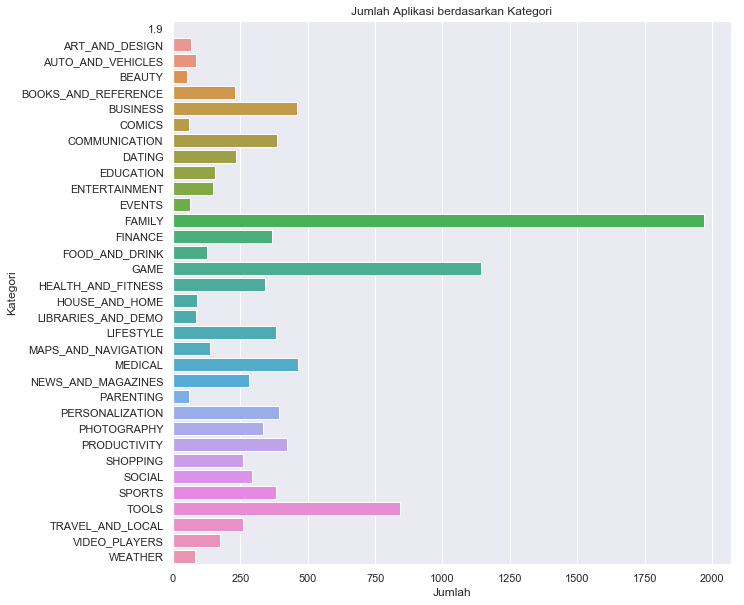

In [266]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Category'].value_counts().values,y=data['Category'].value_counts().index)
plt.xlabel("Jumlah")
plt.ylabel("Kategori")
plt.title("Jumlah Aplikasi berdasarkan Kategori")
plt.xticks(rotation=0)
plt.show()

## B) Jumlah kategori aplikasi berdasarkan Typenya (Gratis / Berbayar)

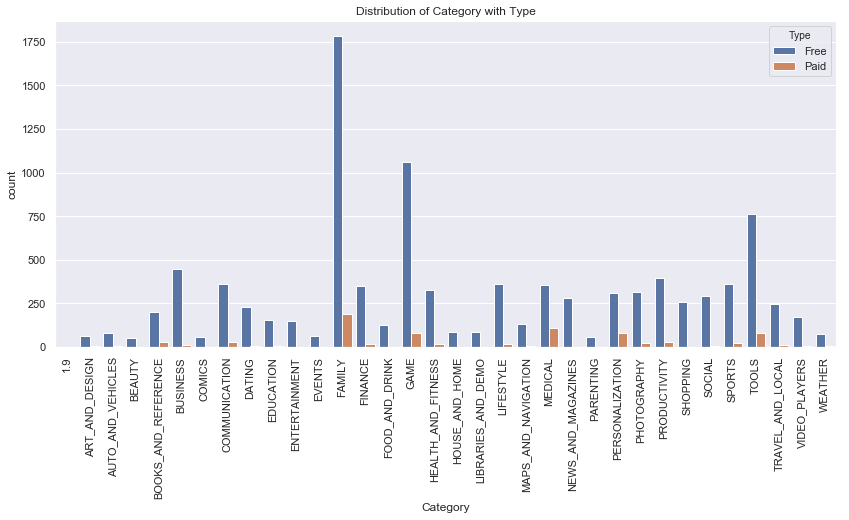

In [291]:
plt.figure(figsize=(14,6))
sns.countplot(data=data,x='Category',hue='Type')
plt.xticks(rotation=90)
plt.title("Distribution of Category with Type");

Terlihat dari hasil plot yang diperoleh bahwa Aplikasi tipe 'Free' lebih banyak dibandingkan aplikasi tipe berbayar untuk masing-masing kategori aplikasi.

## C) Persentase Aplikasi Free vs Paid

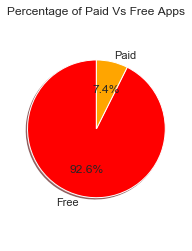

In [298]:
plt.subplot(122)
labels = data.Type.unique() 
sizes = [len(data[data.Type == "Free"]), len(data[data.Type == "Paid"])]
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=["red","orange"]) 
plt.axis('equal');  
plt.title("Percentage of Paid Vs Free Apps");

Dari persentase yang dihasilkan juga telihat aplikasi bertipe free/gratis memiliki jumlah yang lebih banyak dibanding aplikasi berbayar.

## D) 10 Kategori aplikasi dengan jumlah terbanyak

In [299]:
top10_cateogries = data.groupby(data['Category'])['Category'].count().sort_values(ascending=False).head(10)

Text(0.5, 1.0, '% Wise Distribution of Categories')

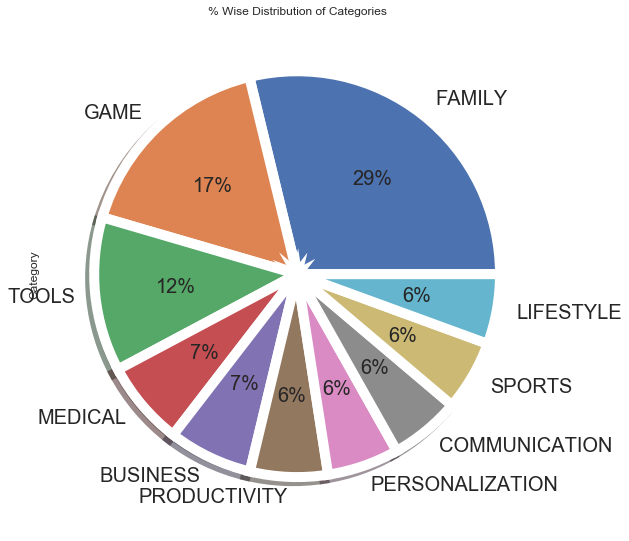

In [300]:
plt.figure(figsize=(20,10))
plt.subplot(121)
top10_cateogries.plot.pie(autopct='%1.f%%',
                                                             wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                             shadow=True,
                                                             fontsize=20)
plt.title("% Wise Distribution of Categories")

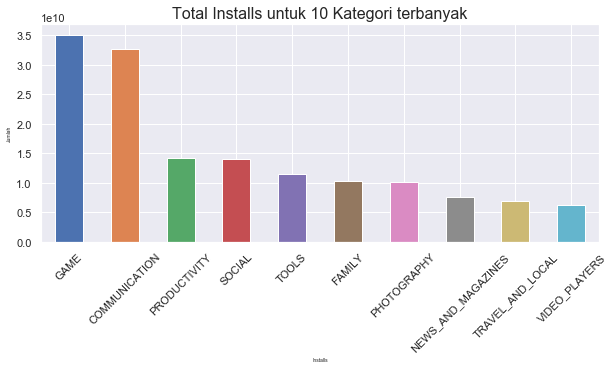

In [301]:
plt.figure(figsize=(10,4))
data.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10).plot(kind='bar');
plt.ylabel('Jumlah', fontsize=5)
plt.xlabel('Installs', fontsize=5)
plt.title("Total Installs untuk 10 Kategori terbanyak", fontsize=16)
plt.xticks(rotation=45);

**Dari 10 Top kategori, Kategori dengan jumlah Install terbanyak adalah GAME, kemudian COMMUNICATION dan yang disusul oleh PRODUCTIVITY**

Dengan jumlah installs seperti dibawah ini:

In [302]:
data.groupby(['Category'], as_index=False)['Installs'].sum().sort_values(by='Installs', ascending=False).head(10)

,Category,Installs
15,GAME,3.508602e+10
7,COMMUNICATION,3.264728e+10
26,PRODUCTIVITY,1.417609e+10
28,SOCIAL,1.406987e+10
30,TOOLS,1.145277e+10
12,FAMILY,1.025826e+10
25,PHOTOGRAPHY,1.008825e+10
22,NEWS_AND_MAGAZINES,7.496318e+09
31,TRAVEL_AND_LOCAL,6.868887e+09
32,VIDEO_PLAYERS,6.222003e+09


## E) 10 Top Aplikasi dengan Persentase Reviews tertinggi

In [303]:
top10_Apps_Higest_Reviews = data[['App','Reviews']].sort_values(by='Reviews',ascending=False).drop_duplicates('App').reset_index().drop('index',axis=1).head(10)
top10_Apps_Higest_Reviews['Reviews'] =round(top10_Apps_Higest_Reviews['Reviews']*100/top10_Apps_Higest_Reviews['Reviews'].sum())
top10_Apps_Higest_Reviews['Reviews'] = top10_Apps_Higest_Reviews['Reviews'].astype(int).astype(str)

top10_Apps_Higest_Reviews['Reviews'] = top10_Apps_Higest_Reviews['Reviews'].apply(lambda x: x+'%')
top10_Apps_Higest_Reviews

,App,Reviews
0,Facebook,17%
1,WhatsApp Messenger,15%
2,Instagram,14%
3,Messenger – Text and Video Chat for Free,12%
4,Clash of Clans,10%
5,Clean Master- Space Cleaner & Antivirus,9%
6,Subway Surfers,6%
7,YouTube,6%
8,"Security Master - Antivirus, VPN, AppLock, Boo...",5%
9,Clash Royale,5%


INSIGHT : **Aplikasi dengan Persentase Reviews tertinggi adalah FACEBOOK**

## F) 10 Top Aplikasi dengan Size terbesar

In [304]:
top10_Apps_Higest_Size = data[['App','Size']].sort_values(by='Size',ascending=False).drop_duplicates('Size').reset_index().drop('index',axis=1).head(10)
top10_Apps_Higest_Size

,App,Size
0,Post Bank,100000.0
1,Miraculous Ladybug & Cat Noir - The Official Game,99000.0
2,Clash of Clans,98000.0
3,Turbo FAST,97000.0
4,AT&T U-verse,96000.0
5,"The Championships, Wimbledon 2018",95000.0
6,Family Guy- Another Freakin' Mobile Game,94000.0
7,Nike Training Club - Workouts & Fitness Plans,93000.0
8,Super Doctor 2 - My Newborn Baby ER Injection,92000.0
9,Fantastic Chefs: Match 'n Cook,91000.0


INSIGHT : **Aplikasi dengan Size terbesar adalah POST BANK dengan jumlah size 100,000 byte =100MB**

## G) 10 Top Aplikasi dengan rating tertinggi

In [305]:
top10_Apps_Higest_Rating = data[['App','Rating']].sort_values(by='Rating',ascending=False).drop_duplicates('Rating').reset_index().drop('index',axis=1).head(10)
top10_Apps_Higest_Rating

,App,Rating
0,ReactNative BG Geolocation,5.000000
1,Business Intelligence & Data,4.900000
2,van Gennip Textiles BV,4.846154
3,Ovia Fertility Tracker & Ovulation Calculator,4.800000
4,Calvin Klein Petite Dresses,4.769231
5,Gun AK 47,4.746154
6,DM Collection,4.723077
7,BD Bank Interest,4.700000
8,BC browser,4.692308
9,West Central Ag,4.669231


INSIGHT : **Aplikasi dengan rating tertinggi adalah ReactNatvive BG Geolocation**

## H) Aplikasi Paling Populer

Disini saya beranggapan bahwa Aplikasi dengan Jumlah Install lebih dari 1 juta download, rating minimal 4,0 dan Reviews lebih dari 10.000 reviews merupakan aplikasi populer. Sehingga diperoleh insight sebagai berikut:

In [306]:
data_temp = data[(data.Installs >= 1000000)
           & (data.Rating >= 4.0)
           & (data.Reviews >=10000)][['App','Category','Rating','Size','Type','Installs']].sort_values('Installs', ascending=0)

In [307]:
freeapp = data_temp[(data_temp.Type == 'Free')][['App']].head(10)
freeapp

,App
4150,Google
3117,Maps - Navigate & Explore
341,Hangouts
340,Gmail
338,Google Chrome: Fast & Secure
336,WhatsApp Messenger
335,Messenger – Text and Video Chat for Free
2554,Google+
3127,Google Street View
3928,YouTube


**Aplikasi gratis terpopuler adalah GOOGLE**

In [310]:
paidapp = data_temp[(data_temp.Type == 'Paid')][['App']].head(10)
paidapp

,App
4034,Hitman Sniper
4347,Minecraft
2241,Minecraft
2242,Card Wars - Adventure Time
9941,Tasker
2883,Facetune - For Free
10682,Fruit Ninja Classic
9678,Where's My Water?
9151,Lost Journey (Dreamsky)
9170,Stickman Legends: Shadow Wars


**Aplikasi berbayar terpopuler adalah Hitman Sniper**